In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import os
import json

Keys in the file: ['CSI_amps']
Name: CSI_amps, type: Dataset
Dataset Shape: (232, 500, 1)
Dataset data type: float32
[[0.375     ]
 [0.35355338]
 [0.375     ]
 [0.375     ]
 [0.375     ]
 [0.35355338]
 [0.3952847 ]
 [0.4506939 ]
 [0.375     ]
 [0.375     ]
 [0.3952847 ]
 [0.35355338]
 [0.35355338]
 [0.2795085 ]
 [0.3952847 ]
 [0.3952847 ]
 [0.35355338]
 [0.375     ]
 [0.2795085 ]
 [0.375     ]
 [0.375     ]
 [0.4506939 ]
 [0.35355338]
 [0.25      ]
 [0.35355338]
 [0.35355338]
 [0.2795085 ]
 [0.3952847 ]
 [0.3952847 ]
 [0.2795085 ]
 [0.3952847 ]
 [0.375     ]
 [0.2795085 ]
 [0.2795085 ]
 [0.3952847 ]
 [0.35355338]
 [0.2795085 ]
 [0.35355338]
 [0.375     ]
 [0.3952847 ]
 [0.375     ]
 [0.2795085 ]
 [0.35355338]
 [0.3952847 ]
 [0.375     ]
 [0.375     ]
 [0.375     ]
 [0.35355338]
 [0.35355338]
 [0.4506939 ]
 [0.35355338]
 [0.3952847 ]
 [0.3952847 ]
 [0.375     ]
 [0.375     ]
 [0.375     ]
 [0.35355338]
 [0.35355338]
 [0.375     ]
 [0.3952847 ]
 [0.2795085 ]
 [0.2795085 ]
 [0.375     ]
 

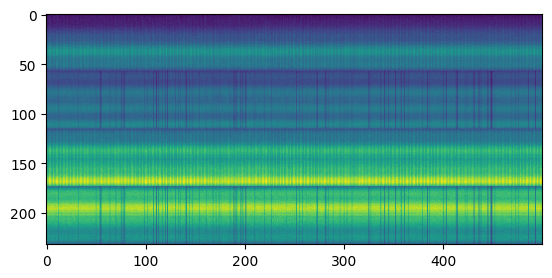

In [7]:

subPath = "sub_Human/user_U06/act_Fall/env_E24/device_HP/session_155000__freq232.h5"
rootPath = "../data/FallDetection/"

fullPath = os.path.join(rootPath, subPath)

with h5py.File(fullPath, 'r') as f:
    print("Keys in the file:", list(f.keys()))

    for name, obj in f.items():
        print(f"Name: {name}, type: {obj.__class__.__name__}")

    dataset = f["CSI_amps"]

    print(f"Dataset Shape: {dataset.shape}")
    print(f"Dataset data type: {dataset.dtype}")

    data_array = dataset[:]
    print(data_array[0])
    plt.imshow(data_array)


In [4]:
labelPath = os.path.join(rootPath, "metadata/sample_metadata.csv")
labels = pd.read_csv(labelPath)
print(labels)

labelMapPath = os.path.join(rootPath, "metadata/label_mapping.json")
with open(labelMapPath, 'r') as f:
    label_mapping = json.load(f)

print(label_mapping)

                                      id  \
0          Human_U07_Fall_E21_HP_2168000   
1          Human_U07_Fall_E21_HP_2169000   
2          Human_U07_Fall_E21_HP_2170000   
3          Human_U07_Fall_E21_HP_2171000   
4          Human_U07_Fall_E21_HP_2172000   
...                                  ...   
6695  Human_U22_Nonfall_E22_ESP32_213000   
6696  Human_U22_Nonfall_E22_ESP32_214000   
6697  Human_U22_Nonfall_E22_ESP32_215000   
6698  Human_U22_Nonfall_E22_ESP32_216000   
6699  Human_U22_Nonfall_E22_ESP32_217000   

                                              file_path subject user activity  \
0     ./sub_Human/user_U07/act_Fall/env_E21/device_H...   Human  U07     Fall   
1     ./sub_Human/user_U07/act_Fall/env_E21/device_H...   Human  U07     Fall   
2     ./sub_Human/user_U07/act_Fall/env_E21/device_H...   Human  U07     Fall   
3     ./sub_Human/user_U07/act_Fall/env_E21/device_H...   Human  U07     Fall   
4     ./sub_Human/user_U07/act_Fall/env_E21/device_H...   Human  U

In [5]:
session = labels[labels["file_path"] == os.path.join(".", subPath)]
session

,id,file_path,subject,user,activity,environment,device,session,is_multi_subject,label,Difficulty
5028,Human_U06_Fall_E24_HP_155000,./sub_Human/user_U06/act_Fall/env_E24/device_H...,Human,U06,Fall,E24,HP,155000,False,Fall,Easy


In [6]:
print(session["label"].item())
label = session["label"].item()
print(label_mapping["label_to_idx"][label])

Fall
0
